In [19]:
import pandas as pd

d = pd.read_csv('student-por.csv')   # here , sep = ';' was the problem, don't know the reason but its solved for now.
len(d)                               # it was breaking code in next line, key error G1 error

649

In [20]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
#d['myName'] = d.apply(lambda rang: "sham", axis=1)

d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head() # to print first few lines of the table
#d.info() #this function is used to get more information about the dataframe like what are all the columns, and how many entries etc.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [21]:
d = pd.get_dummies(d, columns = ['sex','school','address', 'famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']) # these column names have to be exact and case sensitive.

d.head()  # it seems that this function prints the whole dataset in table format

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [22]:
# all this is to determine the number of students passing along with the percentage.
# analyze it well to understand it better
d = d.sample(frac=1)  # to shuffle the dataset and get random instances.

d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'],axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass=d_test['pass']     # d tarin and d test s[lit and all this is useless in current code , may be needed in future.

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

import numpy as np

print("passing : %d out of %d(%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass))/len(d_pass)))

passing : 328 out of 649(50.54%)


In [23]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5) # criterion needs to look, max depth is no. of questions allowed.
# in above line it is initilizing the t.
t = t.fit(d_train_att,d_train_pass) # takes two dataframes, one is training df and a result df t.fit()

In [24]:
tree.export_graphviz(t, out_file="student-per.dot",label="all", impurity=False, proportion=True, feature_names=list(d_train_att),class_names=["fail","pass"],filled=True,rounded=True)
# creating some kind of graph or something

In [25]:
t.score(d_test_att,d_test_pass)
# checking the score of the tree, default function I think

0.6644295302013423

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(t,d_att,d_pass,cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.68 (+/- 0.03)


In [15]:
for max_depth in range(1,20):
    t= tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.64 (+/- 0.03)
Max depth: 2, Accuracy: 0.69 (+/- 0.02)
Max depth: 3, Accuracy: 0.69 (+/- 0.05)
Max depth: 4, Accuracy: 0.69 (+/- 0.03)
Max depth: 5, Accuracy: 0.68 (+/- 0.05)
Max depth: 6, Accuracy: 0.68 (+/- 0.06)
Max depth: 7, Accuracy: 0.68 (+/- 0.07)
Max depth: 8, Accuracy: 0.66 (+/- 0.03)
Max depth: 9, Accuracy: 0.64 (+/- 0.03)
Max depth: 10, Accuracy: 0.65 (+/- 0.06)
Max depth: 11, Accuracy: 0.66 (+/- 0.04)
Max depth: 12, Accuracy: 0.64 (+/- 0.04)
Max depth: 13, Accuracy: 0.65 (+/- 0.04)
Max depth: 14, Accuracy: 0.64 (+/- 0.05)
Max depth: 15, Accuracy: 0.65 (+/- 0.04)
Max depth: 16, Accuracy: 0.64 (+/- 0.02)
Max depth: 17, Accuracy: 0.65 (+/- 0.04)
Max depth: 18, Accuracy: 0.65 (+/- 0.03)
Max depth: 19, Accuracy: 0.65 (+/- 0.04)


In [27]:
depth_acc = np.empty((19,3), float)
i=0

for max_dept in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_dept)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    depth_acc[i,0] = max_dept
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std()*2
    i+=1

depth_acc

array([[1.00000000e+00, 6.37901014e-01, 9.98506705e-03],
       [2.00000000e+00, 6.87167561e-01, 3.86839423e-02],
       [3.00000000e+00, 6.91794872e-01, 4.35625858e-02],
       [4.00000000e+00, 6.85581395e-01, 6.31590093e-02],
       [5.00000000e+00, 6.87191413e-01, 4.46929991e-02],
       [6.00000000e+00, 6.70268336e-01, 6.16782537e-02],
       [7.00000000e+00, 6.62576029e-01, 2.89563716e-02],
       [8.00000000e+00, 6.56410256e-01, 1.41374859e-02],
       [9.00000000e+00, 6.50268336e-01, 3.57974903e-02],
       [1.00000000e+01, 6.40977937e-01, 5.22160593e-02],
       [1.10000000e+01, 6.42564103e-01, 4.61652408e-02],
       [1.20000000e+01, 6.44114490e-01, 3.65039798e-02],
       [1.30000000e+01, 6.42540250e-01, 4.88061524e-02],
       [1.40000000e+01, 6.34824091e-01, 1.54072490e-02],
       [1.50000000e+01, 6.31759094e-01, 6.13913641e-02],
       [1.60000000e+01, 6.34824091e-01, 3.15401295e-02],
       [1.70000000e+01, 6.37972570e-01, 4.87800808e-02],
       [1.80000000e+01, 6.34859

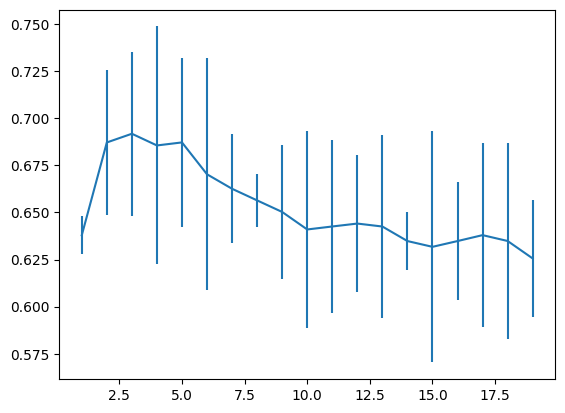

In [28]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.errorbar(depth_acc[:,0],depth_acc[:,1],yerr=depth_acc[:,2])

plt.show()
